In [1]:
import pandas as pd
import scipy
from glob import glob
import os

from JC_functions import *
from JC_momenst import *
from utils import extract_contour_from_mask, ensure_ccw


In [2]:

folder_path = r"D:\_WPI\PAPER_4\data\Animal2000-Original"
png_files = glob(os.path.join(folder_path, "*.jpg"))
contours = []
for file in png_files:
    try:
        contour = extract_contour_from_mask(file)
        contours.append(contour)
    except ValueError as e:
        print(e)
contours = ensure_ccw(contours)
labels = np.repeat(np.arange(20), 100)
N= len(contours)

In [3]:
print(len(contours), len(labels))

2000 2000


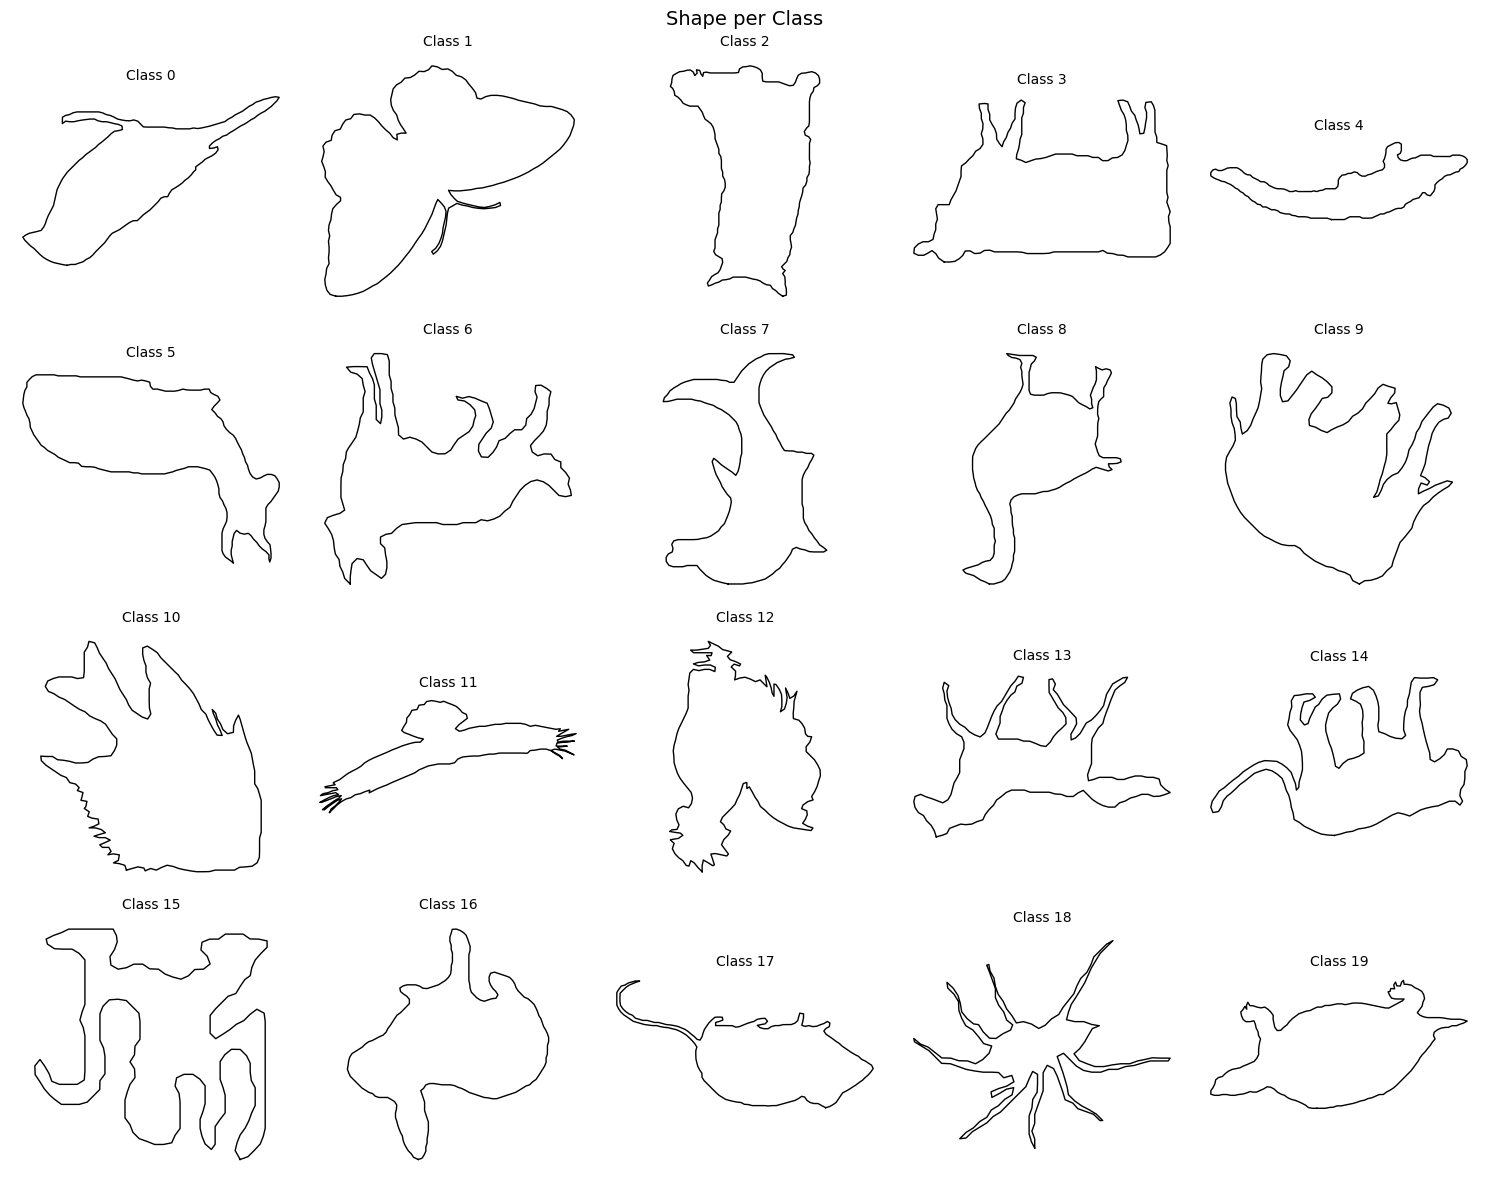

In [4]:
complex_contours = np.array([Normalize(shape_to_complex(reparametrize_by_arc_length(contours[i], 200, False)[1][:-1])) for i in range(N)])

import numpy as np
import matplotlib.pyplot as plt
from itertools import islice


shape_per_class = one_polygon_per_class(complex_contours, labels)

classes = sorted(shape_per_class.keys())
n_classes = len(classes)

# ---- Create grid dynamically ----
ncols = 5
nrows = int(np.ceil(n_classes / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows))
axes = np.atleast_1d(axes).ravel()

# ---- Plot ----
for ax, lab in zip(axes, classes):
    plot_polygon(ax, shape_per_class[lab], color="black", lw=1)
    ax.set_title(f"Class {lab}", fontsize=10)

# ---- Remove unused axes ----
for ax in islice(axes, n_classes, None):
    ax.remove()

plt.suptitle("Shape per Class", fontsize=14)
plt.tight_layout()
plt.show()


In [5]:
feature_dicts = [features_13(remove_duplicate_vertices(leaf)) for leaf in complex_contours]

feature_names = list(feature_dicts[0].keys())
X_real = np.array([
    [fd[name].real if np.iscomplexobj(fd[name]) else fd[name]
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X_imag = np.array([
    [fd[name].imag if np.iscomplexobj(fd[name]) else 0.0
     for name in feature_names]
    for fd in feature_dicts
], dtype=float)

X = np.concatenate([X_real, X_imag], axis=1)

The moment m_{0,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{0,5,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{3,2,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{2,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{0,3,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{0,5,1} is not in the cache. Computing it now. 
Add it in the manually to the list of moments to compute if you want to avoid this in the future.
The moment m_{3,2,1} is not in the cache. Comp

Dimension of ambient space: 26,
Estimated global dimension: 11,
The estimated dimensions per class are: [8 8 8 8 9 9 8 8 8 8 7 8 8 8 9 9 8 9 8 8], 
Upper bound local dimension = 9, 
Centroids positions = [[ 0.25356096 -1.26196661]
 [-2.41921175 -0.28194852]
 [-1.17717073  0.05973192]
 [-0.93677697  1.1660054 ]
 [ 1.16803212 -1.08966488]
 [ 0.77350272  1.28984164]
 [-0.19750217  1.16461852]
 [ 1.56545752 -0.91450284]
 [ 0.96059259  0.80868472]
 [-1.45319224  0.87880136]
 [-1.67220949 -1.25540108]
 [ 2.24672788 -1.01738887]
 [-1.09488439  0.61492785]
 [ 0.67770831  1.56196446]
 [ 0.2081693   0.67278441]
 [ 0.97219529  0.24775057]
 [-2.15795459 -0.4863624 ]
 [ 1.58719097 -0.91844869]
 [ 3.75806331  0.61229888]
 [-2.00725192 -0.83159851]]


C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


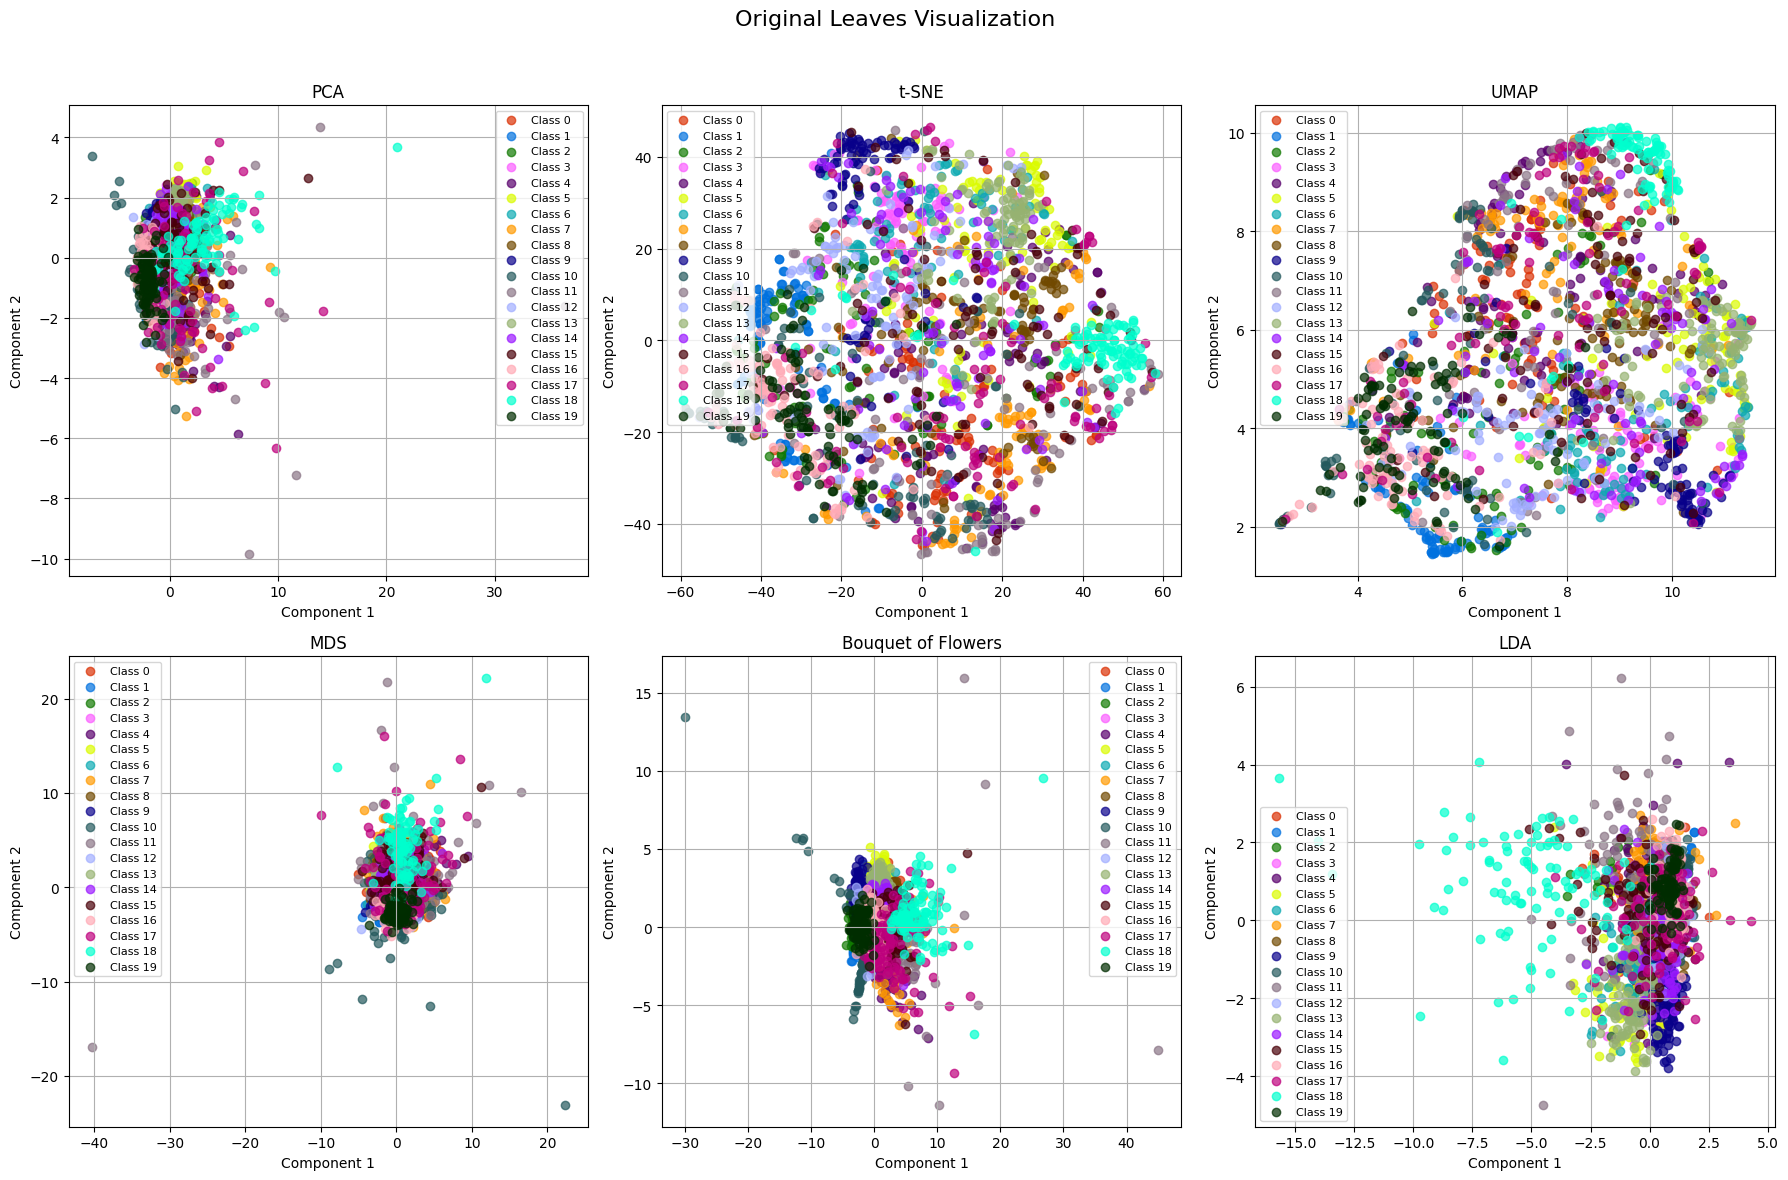

In [6]:
labels = np.asarray(labels).astype(int)
plot_2D(X, labels)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

RF_classifier(X_scaled, labels)


Test accuracy: 0.5820

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        25
           1       0.87      0.80      0.83        25
           2       0.37      0.28      0.32        25
           3       0.75      0.72      0.73        25
           4       0.35      0.24      0.29        25
           5       0.69      0.44      0.54        25
           6       0.27      0.36      0.31        25
           7       0.58      0.76      0.66        25
           8       0.63      0.68      0.65        25
           9       0.65      0.88      0.75        25
          10       0.58      0.60      0.59        25
          11       0.61      0.56      0.58        25
          12       0.65      0.80      0.71        25
          13       0.58      0.88      0.70        25
          14       0.87      0.52      0.65        25
          15       0.43      0.24      0.31        25
          16       0.34      0.44  